# UserIIF

在User-CF的基础上考虑了物品的流行度，流行度越大，惩罚力度越大。  
相似度：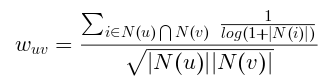

## 载入数据

In [1]:
import pandas as pd
from UserIIF.util.data_reader import DataReader

In [2]:
data_reader_obj = DataReader()
movielen_data = data_reader_obj.read_all_data(file_path="./UserIIF/data/ml-100k/u.data")
movielen_df = pd.DataFrame(movielen_data, columns=["UserID", "MovieID", "Rating", "TimeStamp"])
movielen_df.head()

,UserID,MovieID,Rating,TimeStamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


## 用户行为分析

### 用户活跃度、物品流行度

In [3]:
import numpy as np

In [4]:
# 每个item具有多少个用户，统计
sum_movie_rating = (
    movielen_df[["UserID", "MovieID"]].groupby("MovieID", as_index=False).count()
)
sum_movie_rating.head()

,MovieID,UserID
0,1,452
1,2,131
2,3,90
3,4,209
4,5,86


In [5]:
# 将用户那一列改成ItemPopularity 统计每个项目有多少个用户 -- 意思是，统计每个item有多少用户（--意即，每个项目的流行度）
sum_movie_rating.rename(
    mapper = {"UserID": "ItemPopularity"},
    axis = 1,
    inplace = True
)
sum_movie_rating

,MovieID,ItemPopularity
0,1,452
1,2,131
2,3,90
3,4,209
4,5,86
...,...,...
1677,1678,1
1678,1679,1
1679,1680,1
1680,1681,1


In [6]:
# 按照ItemPopularity分组，每一个ItemPopularity对应的数量可以直观地看出来
sum_movie_rating = sum_movie_rating.groupby("ItemPopularity", as_index=False, ).count()
sum_movie_rating

,ItemPopularity,MovieID
0,1,141
1,2,68
2,3,60
3,4,64
4,5,51
...,...,...
268,485,1
269,507,1
270,508,1
271,509,1


In [7]:
sum_movie_rating.rename(
    mapper={"MovieID": "item_popularity_counts"},
    inplace=True,
    axis=1
)
sum_movie_rating

,ItemPopularity,item_popularity_counts
0,1,141
1,2,68
2,3,60
3,4,64
4,5,51
...,...,...
268,485,1
269,507,1
270,508,1
271,509,1


In [8]:
sum_movie_rating["log_item_popularity"] = np.log10(sum_movie_rating["ItemPopularity"])
sum_movie_rating.head(10)

,ItemPopularity,item_popularity_counts,log_item_popularity
0,1,141,0.000000
1,2,68,0.301030
2,3,60,0.477121
3,4,64,0.602060
4,5,51,0.698970
5,6,39,0.778151
6,7,44,0.845098
7,8,30,0.903090
8,9,33,0.954243
9,10,33,1.000000


movielen_df
       UserID  MovieID  Rating  TimeStamp
0         196      242       3  881250949
1         186      302       3  891717742
2          22      377       1  878887116
3         244       51       2  880606923
4         166      346       1  886397596
...       ...      ...     ...        ...
99995     880      476       3  880175444
99996     716      204       5  879795543
99997     276     1090       1  874795795
99998      13      225       2  882399156
99999      12      203       3  879959583

[100000 rows x 4 columns]
item_popularity
     UserID  MovieID  Rating  TimeStamp
0         1      272     272        272
1         2       62      62         62
2         3       54      54         54
3         4       24      24         24
4         5      175     175        175
..      ...      ...     ...        ...
938     939       49      49         49
939     940      107     107        107
940     941       22      22         22
941     942       79      79         79
9

Text(0.5, 1.0, '用户活跃度-物品流行度')

D:\SoftwareInstall\Anaconda\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 29992 (\N{CJK UNIFIED IDEOGRAPH-7528}) missing from current font.
  func(*args, **kwargs)
D:\SoftwareInstall\Anaconda\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 25143 (\N{CJK UNIFIED IDEOGRAPH-6237}) missing from current font.
  func(*args, **kwargs)
D:\SoftwareInstall\Anaconda\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 27963 (\N{CJK UNIFIED IDEOGRAPH-6D3B}) missing from current font.
  func(*args, **kwargs)
D:\SoftwareInstall\Anaconda\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 36291 (\N{CJK UNIFIED IDEOGRAPH-8DC3}) missing from current font.
  func(*args, **kwargs)
D:\SoftwareInstall\Anaconda\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  func(*args, **kwargs)
D:\SoftwareInstall\Anaconda\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyp

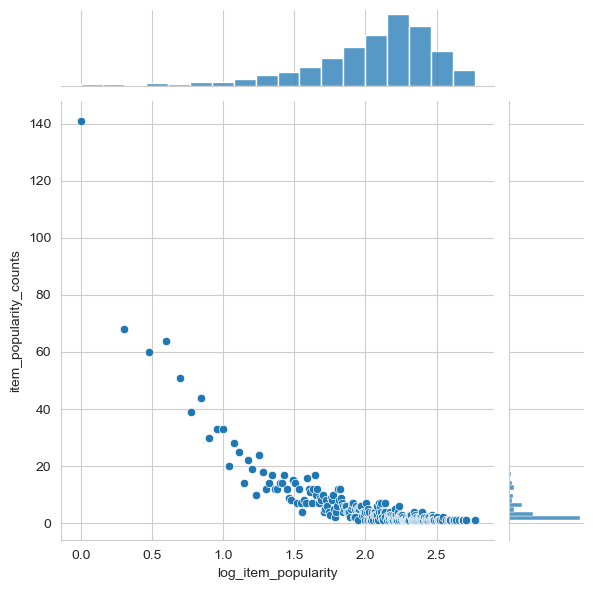

D:\SoftwareInstall\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 29992 (\N{CJK UNIFIED IDEOGRAPH-7528}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\SoftwareInstall\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25143 (\N{CJK UNIFIED IDEOGRAPH-6237}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\SoftwareInstall\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27963 (\N{CJK UNIFIED IDEOGRAPH-6D3B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\SoftwareInstall\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 36291 (\N{CJK UNIFIED IDEOGRAPH-8DC3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\SoftwareInstall\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  fig.canvas.prin

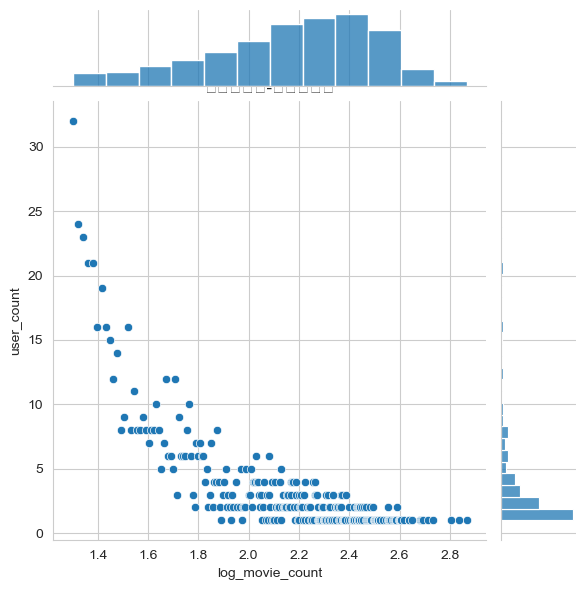

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

print("movielen_df")
print(movielen_df)

sns.set_style("whitegrid")
axe = sns.jointplot(x="log_item_popularity", y="item_popularity_counts", data=sum_movie_rating)

item_popularity = movielen_df.groupby("UserID", as_index=False, ).count()

print("item_popularity")
print(item_popularity)

item_popularity.rename(mapper={"MovieID": "movie_count"}, axis=1, inplace=True)
print("item_popularity rename")
print(item_popularity)

item_popularity = item_popularity.groupby(["movie_count"], as_index=False, ).count()
item_popularity.rename(mapper = {"UserID" : "user_count"},axis = 1,inplace = True)
item_popularity["log_movie_count"] = np.log10(item_popularity.movie_count)

sns.set_style("whitegrid")
sns.jointplot(data = item_popularity,x = "log_movie_count",y = "user_count")
plt.title("用户活跃度-物品流行度")

In [10]:
user_activity = movielen_df[["UserID", "MovieID"]].groupby("UserID").count()
user_activity.rename(mapper={"MovieID": "user_activity"}, axis=1, inplace=True)

movie_popularity = (movielen_df[["UserID", "MovieID"]].groupby("MovieID", as_index=False).count())
movie_popularity.rename({"UserID" : "movie_popularity"},axis = 1,inplace = True)
movie_popularity

,MovieID,movie_popularity
0,1,452
1,2,131
2,3,90
3,4,209
4,5,86
...,...,...
1677,1678,1
1678,1679,1
1679,1680,1
1680,1681,1


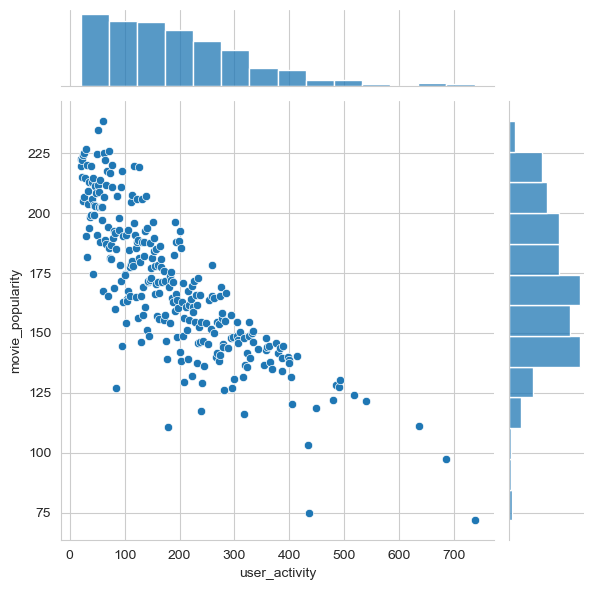

In [11]:
combine = pd.merge(left=movielen_df, right = user_activity, on="UserID")
combine = pd.merge(left=combine, right = movie_popularity, on="MovieID")

combine = combine.groupby(["user_activity"], as_index=False, ).mean()

sns.set_style("whitegrid")
sns.jointplot(data = combine,x = "user_activity",y = "movie_popularity")

## 划分数据集

In [12]:
from UserIIF.util import data_reader

dr = data_reader.DataReader()
train_set, test_set = dr.split_dataset(file_path=r"./UserIIF/data/ml-100k/u.data", ratio=0.8, seed=2024)


## 训练

In [13]:
from UserIIF.recommender import user_iif
uf = user_iif.UserIIF()

uf.train(train_data=train_set, sim_matrix_path=r"./UserIIF/data/sim_matrix.pkl")

initializing train data...
data has been initialized.
begin to train model...
user similarity matrix had been loaded.


loading user similarity matrix...
try to save user similarity matrix again...
successfully saved user similarity matrix.
successfully train the model.


## 评估


In [14]:
def train_popularity(train):
    """计算训练集的流行度
    
    """
    train_popularity = dict()
    for user,item,_ in train:
        train_popularity.setdefault(item,0)
        train_popularity[item] += 1
    return train_popularity

In [15]:
from UserIIF.util import metric

metric_ = metric.Metric()

test = dict()
for user, item, _ in test_set:
    test.setdefault(user, [])
    test[user].append(item)
    
def evaluate(N, K):
    recommends = uf.recommend_users(test.keys(),N = N,K = K)
    all_items = dr.get_all_items(r"./UserIIF/data/ml-100k/u.data")
    item_popularity = train_popularity(train_set, )

    recall = metric_.recall(recommends=recommends,test_set=test)
    precision = metric_.precision(recommends = recommends,test_set = test)
    coverage = metric_.coverage(recommends = recommends,all_items = all_items)
    popularity = metric_.popularity(item_popularity=item_popularity,recommends=recommends)
    
    return precision,recall,coverage,popularity


In [16]:
N = 30   #表示推荐的商品个数
K_list = [5,10,20,40,80,160]  #表示临近用户的list
evals = list()

for k in K_list:
    single_eval = evaluate(N = N,K = k)
    evals.append(single_eval)

recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend syst

recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend syst

recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend syst

recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend syst

recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend syst

recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend syst

recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend syst

recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend syst

recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend syst

recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend syst

recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend syst

recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend syst

recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend syst

recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend syst

recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend syst

recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend syst

recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend syst

recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend syst

recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend syst

recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend syst

recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend system run over.
recommend system is running...
recommend syst

In [17]:
pd.DataFrame(
        data = evals,
        index = K_list,
        columns = ["Precision","Recall","Coverage","Popularity"]
)

,Precision,Recall,Coverage,Popularity
5,0.299960,0.212456,0.00951,4.917669
10,0.334882,0.237190,0.00776,5.062486
20,0.355066,0.251486,0.00616,5.169804
40,0.357114,0.252937,0.00494,5.244942
80,0.349171,0.247311,0.00378,5.301625
160,0.332834,0.235740,0.00311,5.347554
